# Team 112 Data and Analysis Plan

# 1 Central Motivation
Music tends to be grouped in pre-existing genres like pop, rock, electronic, and classical. Through this project, we’d like to find a more natural grouping of songs that are more catered to a user’s emotions based on the way they respond to different genres - this may help streaming services such as Spotify recommend people more relevant songs.

# 2 Obtaining and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df_emot = pd.read_csv('music_annotations.csv')
df_emot.head()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English


In [2]:
# strip spaces in columns 
df_emot.columns = df_emot.columns.str.strip()

# drop NAs
df_emot.dropna(axis=0, inplace = True)

# 3 Visualizations

### Visualization 1: subplot of genre and counts of each evoked emotion

In [3]:
# group data by genre and corresponding value sums
df_genre_sum = df_emot.groupby(['genre']).sum()
df_genre_sum = df_genre_sum.reset_index()
df_genre_sum

/var/folders/jp/5d1cmmq52x19b5x087vfqjw40000gn/T/ipykernel_10875/4285357379.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_genre_sum = df_emot.groupby(['genre']).sum()


,genre,track id,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender
0,classical,104166,423,694,558,676,919,388,748,464,464,9590,1280,269,93273,1197
1,electronic,428296,224,425,132,238,509,459,516,693,209,6376,606,491,54162,727
2,pop,624111,219,265,476,627,615,226,397,333,434,6355,640,478,56764,1001
3,rock,282046,253,288,385,630,518,458,484,400,437,7052,765,519,63569,910


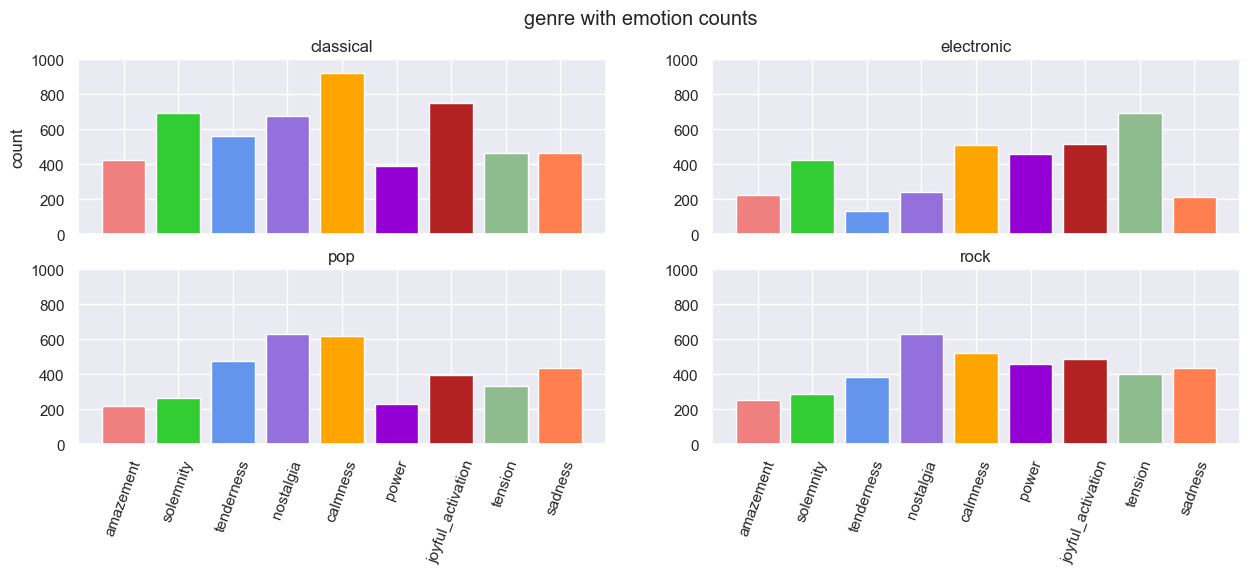

In [4]:
import seaborn as sns
sns.set()

# create x feature list 
x_feat_list = []
for col in df_emot.columns[2:11]:
    x_feat_list.append(col)
    
# create genre list
genre_ls = ['classical', 'electronic', 'pop', 'rock']

# colors for plotting
my_colors = ['lightcoral', 'limegreen', 'cornflowerblue', 'mediumpurple', 
             'orange', 'darkviolet', 'firebrick', 'darkseagreen', 'coral']

# loop through genres
for idx in range(len(genre_ls)):
    # get genre
    genre = genre_ls[idx]
    # extract emotion values corresponding to genre
    x = x_feat_list
    y = df_genre_sum[df_genre_sum['genre'] ==  genre].loc[:,x_feat_list].values
    
    #plot
    plt.subplot(2, 2, idx + 1)
    plt.bar(x, y[0], color = my_colors)
                 
    # title
    plt.gca().title.set_text(genre)
    plt.xticks(rotation=70)
    plt.ylim(0, 1000)

    # label count on first graph
    if idx == 0:
        plt.ylabel('count')
        
    # remove top two plots' labels
    if idx in [0, 1]:
        plt.tick_params(labelbottom = False, bottom = False)
             
# add title to entire plot
plt.suptitle('genre with emotion counts')
plt.gcf().set_size_inches((15, 5))   

This subplot bargraph distinguishes between each genre and what feelings were evoked from each participant's listen, and this can show similarities and differenes among genres and emotions. For example, classical music evoked the most `calmness` and `joyful_activation` in a participant, while electronic music evoked the most `tension` in a participant. 

### Visualization 2: Violin plot of age distribution of participant listening to a certain genre, and distribution of if they liked/disliked the song within the genre.

#### making a new column to represent if participant liked or disliked the song. 
- replace 1 (likes song) in 'liked' column with 2 to distinguish between liked and disliked in new column
- new column 'liked/disliked' will have 1 (disliked) and 2 (liked). Any other value will be discarded for this visualization. 

In [5]:
# replacing liked with 2 to distinguish for new column
df_emot['liked'] = df_emot['liked'].replace([1, 0], [2, 0])

# creating new column 
df_emot['liked/disliked'] = df_emot['liked'] + df_emot['disliked']

# drop value 0 and 3
df_emot.drop(df_emot[df_emot['liked/disliked']== 3].index, inplace = True)
df_emot.drop(df_emot[df_emot['liked/disliked']== 0].index, inplace = True)

# replace with words for easy plotting
df_emot['liked/disliked'] = df_emot['liked/disliked'].replace(to_replace = [2, 1], value = ['liked', 'disliked'])

df_emot['liked/disliked'].value_counts()

liked       3232
disliked    1698
Name: liked/disliked, dtype: int64

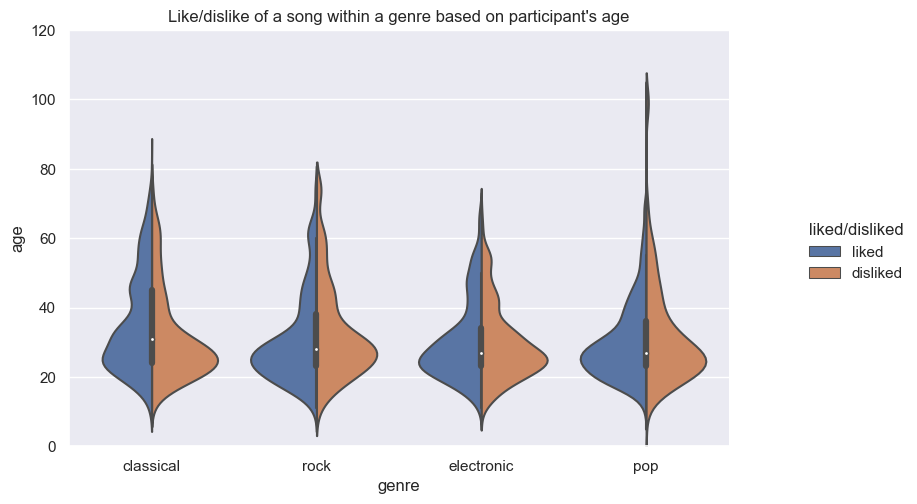

In [6]:
# plot
sns.catplot(data=df_emot, x="genre", y="age", hue = 'liked/disliked', kind = 'violin', split = True)

# title and ylim
plt.title("Like/dislike of a song within a genre based on participant's age")
plt.ylim(0, 120)
plt.gcf().set_size_inches((10, 5)) 

This violin plot helps us distinguish how age may affect how someone likes a genre. For example, participants ranging from around 18-35 disliked `classical` music, however many in the 20-40 range still liked `classical` music, and the age ranged expands up to 60 for those who enjoy that genre. Although there are some differences that can be observed, this graph also shows that age may not have the heaviest weight on if a participant's age likes or dislikes a certain genre, for there some symmetry between those who like and dislike the song within the genre.

# 4 Machine Learning Tools
For this project, we’ll be using machine learning techniques for classification. 

Using a Knn classification will allow us to see how each song relates to each other as well as which ‘emotional reactions’ tend to be paired together within genres. This information may allow us to build a recommendation system whereby users receive suggestions for new songs based on the predicted emotion evoked, not genre.

Similarly, we can use a decision tree. This will classify each genre by their most important features - in this case, the most prominent emotions they evoke in people.

If these tools do not work, using clustering to study if genres can be resconstructed based off the emotions it evokes rather than a song's sound may be another technique.